### Defining The MSE Cost Function
### $$MSE = \frac{1}{n} \sum_{i=1}^{n} \big( y^{(i)} - h_\theta x^{(i)} \big)^2 $$
### $$MSE = \frac{1}{n} \sum_{i=1}^{n} \big( y - \hat{y} \big)^2 $$

In [16]:
def mse(y,y_hat):
    n = len(y)
    return sum((y-y_hat)**2)/ n

### Populating the Data

In [20]:
import numpy as np
x_list = np.array([0.1, 1.2, 2.4, 3.2, 4.1, 5.7, 6.5]).reshape(7,1)
y_list = np.array([1.7, 2.4, 3.5, 3.0, 6.1, 9.4, 8.2]).reshape(7,1)

### Running the Linear Regression

In [57]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()

#to run regression,regr.fit takes 2D arrays, so we need to reshape or transpose our data
regr.fit(x_list,y_list)
theta_0 = regr.intercept_[0]
theta_1 = regr.coef_[0][0]
theta_0,theta_1


(0.8475351486029545, 1.2227264637835913)

### Plotting The Linear Regression

[0.94796558]


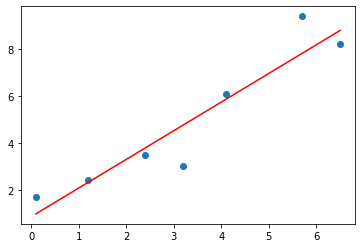

In [59]:
#Plotting the Regression
from matplotlib import pyplot as plt
plt.scatter(x_list,y_list)
plt.plot(x_list,regr.predict(x_list),color="red")

#finding value using regression
y_hat = theta_0 + theta_1*x_list
#so mse value is:
mse_value = mse(y_list,y_hat)
print(mse_value)

## Plotting The MSE Cost Function in 3D

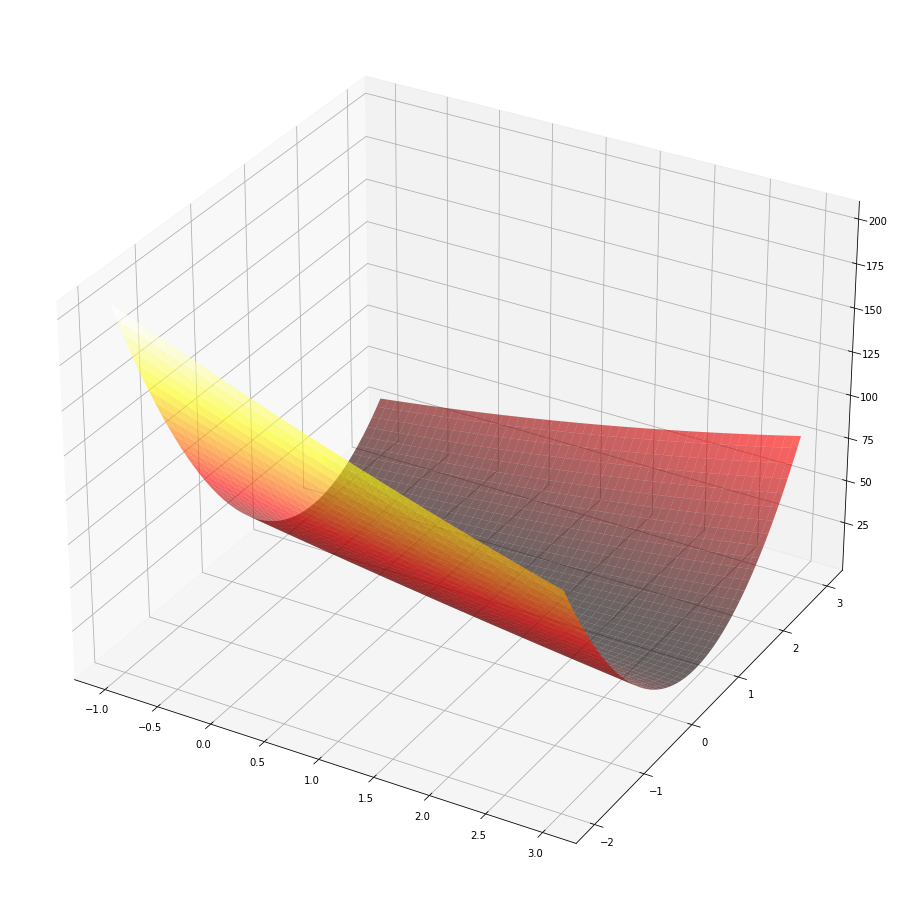

In [44]:
#we need theta_0, theta_1 and mse(theta_0,theta_1) list.
#lets generate theta_0 and theta_1 with linspace
nr_thetas = 200
plot0_list = np.linspace(-1,3,nr_thetas)
plot1_list = np.linspace(-2,3,nr_thetas)
#since plot,we need to meshgrid them, so
plot0_list, plot1_list = np.meshgrid(plot0_list,plot1_list)

#lets populate the mse for all these values
plot_cost_list = np.zeros((len(plot0_list),len(plot0_list[0])))
for i in range((len(plot0_list))):
               for j in range((len(plot0_list[0]))):
                              y_hat = plot0_list[i][j]+ plot1_list[i][j]*x_list
                              plot_cost_list[i][j] = mse(y_list,y_hat)

#now we can graph the MSE Cost Function in 3D
from matplotlib import cm
fig = plt.figure(figsize=(16,20))
ax = fig.add_subplot(projection="3d")
ax.plot_surface(plot0_list,plot1_list,plot_cost_list,alpha=0.6,cmap=cm.hot)

# Gradient Descent on MSE and Plotting Gradient Descent in 3D

### The Gradient Descent Algorithm

In [45]:
#To run gradient descent, we need to use full equation and the partial derivatives

In [46]:
def gradient(x,y,params):
    n = y.size
    theta0_slope = (-2/n)* sum(y-params[0]- params[1]*x)
    theta1_slope = (-2/n)* sum((y-params[0]- params[1]*x)*x)
    return np.concatenate((theta0_slope,theta1_slope),axis=0)

In [66]:
#The Grad Descent Algo
steps_mutliplier = 0.01
params = np.array([2.9, 2.9])

# Collect data points for scatter plot
values_list= params.reshape(1, 2)
for _ in range(1000):
    params = params - (steps_mutliplier*gradient(x_list,y_list,params))
    values_list = np.append(values_list,values=params.reshape(1,2),axis=0)


(1001, 2)

### Plotting The Gradient Descent

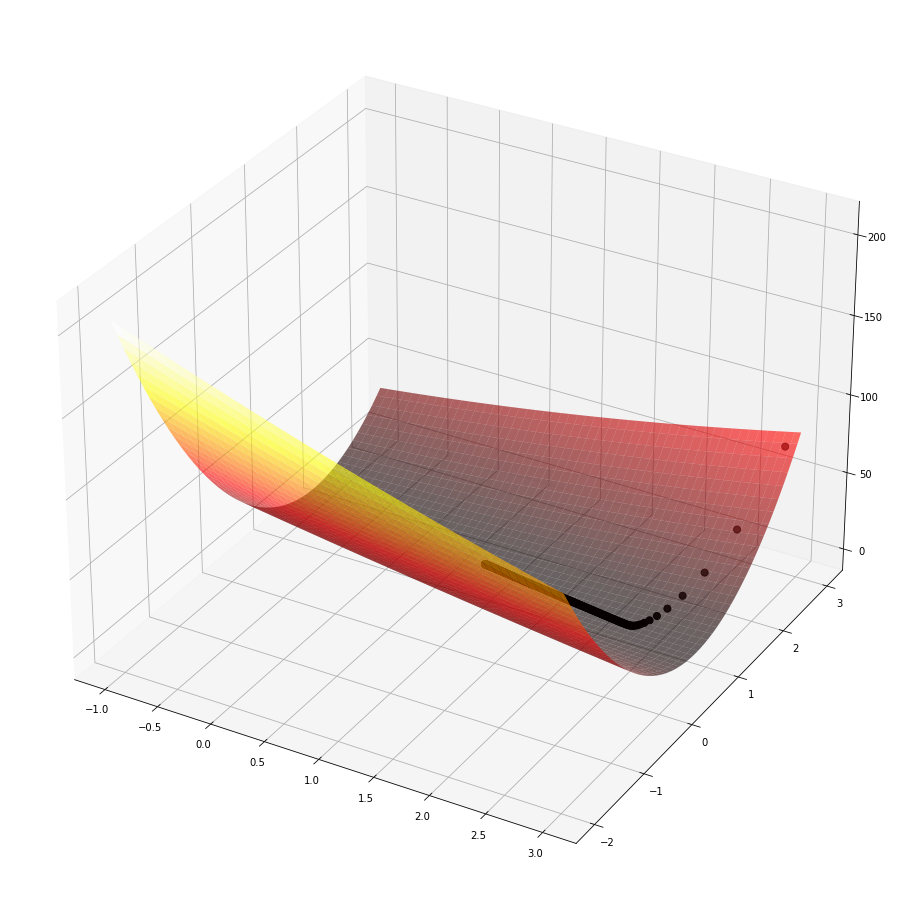

In [74]:
#We need all thetas generated in gradient descent, and the mse value of those,we can call mse directly
fig = plt.figure(figsize=(16,20))
ax = fig.add_subplot(projection="3d")
ax.plot_surface(plot0_list,plot1_list,plot_cost_list,alpha=0.6,cmap=cm.hot)
ax.scatter(values_list[:,0],values_list[:,1],mse(y_list,values_list[:,0]+values_list[:,1]*x_list),color="black",s=50)

Footnote : np.zeros and np.concatenate both requires(()), 
for concatenate,its np.concatenate((arr1,arr2),axis=)
np.transpose requires ([[]]),so if a = np.array([1,2]),
to trasnpose, do a = np.array([[1,2,3]]).transpose().
When we use linsapce,we need to meshgrid them to plot. When we use np.array, we can reshape or transpose them.
Both regr.fit() and plt.plot() requires 2D arrays as arguments.